In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [146]:
df=pd.read_csv('Train.csv')

In [147]:
df.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

C:\Users\SAMRIDHI BISHT\AppData\Local\Temp\ipykernel_12596\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

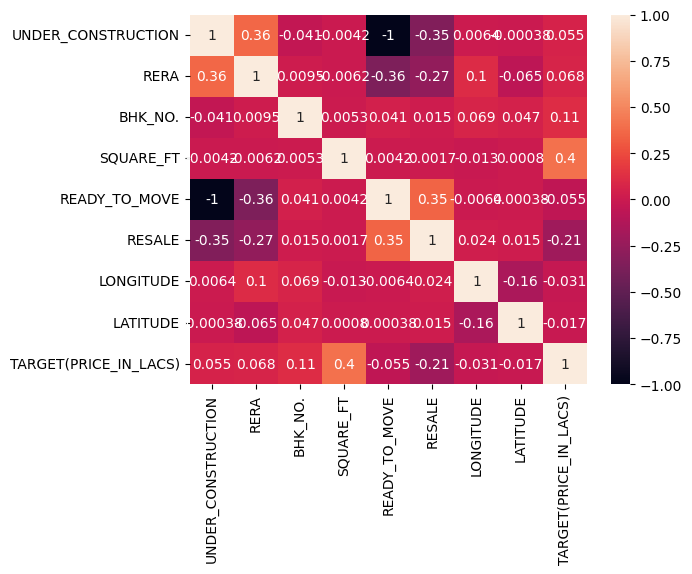

In [148]:
sns.heatmap(df.corr(),annot=True)

In [149]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [150]:
df=df.drop(columns=['ADDRESS'])

In [151]:
df = pd.get_dummies(df, columns=['POSTED_BY'], drop_first=True)

In [152]:
df['BHK_OR_RK'] = df['BHK_OR_RK'].replace({'BHK': 1, 'RK': 0})

In [153]:
df.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Dealer,POSTED_BY_Owner
0,0,0,2,1,1300.236407,1,1,12.969910,77.597960,55.0,0,1
1,0,0,2,1,1275.000000,1,1,12.274538,76.644605,51.0,1,0
2,0,0,2,1,933.159722,1,1,12.778033,77.632191,43.0,0,1
3,0,1,2,1,929.921143,1,1,28.642300,77.344500,62.5,0,1
4,1,0,2,1,999.009247,0,1,22.592200,88.484911,60.5,1,0


In [160]:
data=pd.read_csv('Test.csv')

In [161]:
data=data.drop(columns=['ADDRESS'])

In [162]:
data = pd.get_dummies(data, columns=['POSTED_BY'], drop_first=True)

In [163]:
data['BHK_OR_RK'] = data['BHK_OR_RK'].replace({'BHK': 1, 'RK': 0})

In [164]:
data.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,POSTED_BY_Dealer,POSTED_BY_Owner
0,0,0,1,1,545.171340,1,1,21.262000,73.047700,0,1
1,1,1,2,1,800.000000,0,0,18.966114,73.148278,1,0
2,0,0,2,1,1257.096513,1,1,22.592200,88.484911,1,0
3,0,0,3,1,1400.329489,1,1,26.988300,75.584600,1,0
4,0,0,1,1,430.477830,1,1,22.700000,72.870000,0,1


In [154]:
X_train=df[['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'LONGITUDE',
       'LATITUDE']]

In [155]:
y_train=df['TARGET(PRICE_IN_LACS)']

In [165]:
X_test=data[['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'LONGITUDE',
       'LATITUDE']]

In [166]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [167]:
pred=lm.predict(X_test)

In [168]:
data['Predicted_Target'] = pred
data.to_csv('test_with_predictions.csv', index=False)


In [169]:
d=pd.read_csv('test_with_predictions.csv')

In [170]:
d.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,POSTED_BY_Dealer,POSTED_BY_Owner,Predicted_Target
0,0,0,1,1,545.171340,1,1,21.262000,73.047700,0,1,-10.008479
1,1,1,2,1,800.000000,0,0,18.966114,73.148278,1,0,579.567654
2,0,0,2,1,1257.096513,1,1,22.592200,88.484911,1,0,46.821477
3,0,0,3,1,1400.329489,1,1,26.988300,75.584600,1,0,132.932389
4,0,0,1,1,430.477830,1,1,22.700000,72.870000,0,1,-14.827425
